<a href="https://colab.research.google.com/github/sacrafont/JPEG-ARTIFACT-REMOVER/blob/main/gaussian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab'a hoş geldiniz.

## Gemini API'yi keşfedin
Gemini API, Google DeepMind tarafından oluşturulan Gemini modellerine erişmenizi sağlar. Gemini modelleri baştan sona çok formatlı olacak şekilde tasarlandığından metin, görsel, kod ve seslerle ilgili sorunsuz şekilde mantık yürütebilirsiniz.

**Kullanmaya başlama adımları**
*  <a href="https://aistudio.google.com/">Google AI Studio</a>'ya gidip Google Hesabınızla giriş yapın.
*  <a href="https://aistudio.google.com/app/apikey">API anahtarı oluşturma</a>.
* <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb">Python</a> hızlı başlangıç kılavuzunu kullanın veya <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a> kullanarak REST API'yi çağırın.

**Gemini'nin gelişmiş özelliklerini keşfedin**
*  Metin ile görüntüleri tekrar tekrar karıştırarak Gemini'ın <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Image-out.ipynb">çok formatlı çıkışlarıyla</a> denemeler yapın.
*  <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_LiveAPI.ipynb">Çok formatlı Live API</a>'yi keşfedin &#40;demoyu <a href="https://aistudio.google.com/live">burada</a> bulabilirsiniz&#41;.
*  Gemini'ı kullanarak <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Spatial_understanding.ipynb&quot;">görüntüleri analiz etmeyi ve resimlerinizdeki öğeleri tespit etmeyi</a> öğrenin &#40;ayrıca <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Spatial_understanding_3d.ipynb">3D versiyonlar</a> da mevcuttur&#41;.
*  Karmaşık görevleri kendi düşünceleriyle çözebilen <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_thinking.ipynb">Gemini düşünme modelinin</a> gücünden faydalanın.
      
**Karmaşık kullanım alanlarını keşfedin**
*  Modelin internette bulabileceği bilgilere dayalı olarak bir şirket hakkında rapor oluşturmak için <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Search_grounding_for_research_report.ipynb">Gemini temellendirme özelliklerini</a> kullanın.
*  <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Pdf_structured_outputs_on_invoices_and_forms.ipynb">PDF'lerdeki fatura ve form verilerini</a> yapılandırılmış bir şekilde ayıklayın.
*  Gemini'ın büyük bağlam penceresini ve Imagen'i kullanarak <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Book_illustration.ipynb">bir kitabın tamamına dayalı resimler</a> oluşturun.

Daha fazla bilgi edinmek için <a href="https://github.com/google-gemini/cookbook">Gemini çözüm kitabını</a> veya <a href="https://ai.google.dev/docs/">Gemini API belgelerini</a> inceleyin.


Colab'de artık <a href="https://gemini.google.com">Gemini</a> tarafından desteklenen yapay zeka özellikleri sunuluyor. Python'u yeni kullanmaya başlayanlar veya deneyimli kullanıcılar için aşağıdaki videoda bu özelliklerin nasıl kullanılacağı açıklanmaktadır.

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  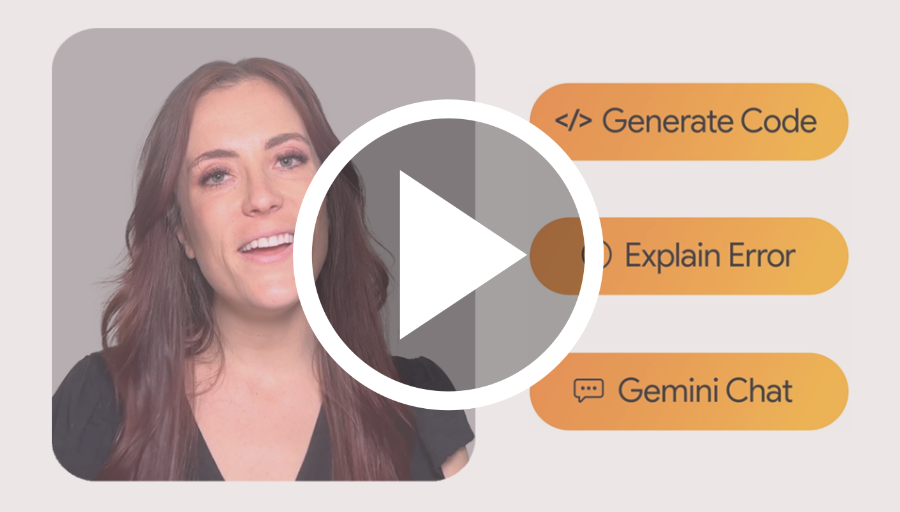
  </a>
</center>

<div class="markdown-google-sans">
  <h2>Colab nedir?</h2>
</div>

Colab veya diğer adıyla "Colaboratory", tarayıcınızda Python'u yazmanızı ve çalıştırmanızı sağlar.
- Hiç yapılandırma gerektirmez
- GPU'lara ücretsiz erişim
- Kolay paylaşım imkanı sunar

İster <strong>öğrenci</strong> ister <strong>veri bilimci</strong> ister <strong>yapay zeka araştırmacısı</strong> olun, Colab işinizi kolaylaştırabilir. Daha fazla bilgi edinmek için <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introduction to Colab</a> &#40;Colab'e Giriş&#41; veya <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y">Colab Features You May Have Missed</a> &#40;Kaçırmış Olabileceğiniz Colab Özellikleri&#41; videolarını izleyebilir ya da aşağıdan hemen kullanmaya başlayabilirsiniz.

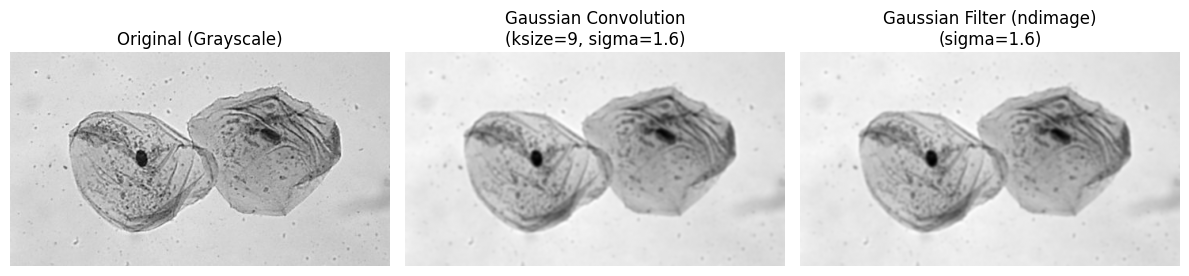

In [1]:
!pip install numpy scipy matplotlib pillow requests

import requests, io
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter

url = "https://ichef.bbci.co.uk/images/ic/480xn/p01chfyr.jpg"
response = requests.get(url, timeout=20)
response.raise_for_status()

img = Image.open(io.BytesIO(response.content)).convert("L")
img_np = np.asarray(img).astype(np.float32) / 255.0

def make_gaussian_kernel(ksize=9, sigma=1.6):
    assert ksize % 2 == 1
    ax = np.arange(-(ksize // 2), ksize // 2 + 1)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2.0 * sigma**2))
    kernel /= kernel.sum()
    return kernel

ksize, sigma = 9, 1.6
gk = make_gaussian_kernel(ksize, sigma)
img_gauss_conv = convolve2d(img_np, gk, mode='same', boundary='symm')
img_gauss_ref = gaussian_filter(img_np, sigma=sigma)

plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.title("Original (Grayscale)")
plt.imshow(img_np, cmap="gray")
plt.axis("off")

plt.subplot(1,3,2)
plt.title(f"Gaussian Convolution\n(ksize={ksize}, sigma={sigma})")
plt.imshow(img_gauss_conv, cmap="gray")
plt.axis("off")

plt.subplot(1,3,3)
plt.title(f"Gaussian Filter (ndimage)\n(sigma={sigma})")
plt.imshow(img_gauss_ref, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


<div class="markdown-google-sans">

## <strong>Başlarken</strong>
</div>

Okuduğunuz doküman statik bir web sayfası değil, kod yazmanıza ve yürütmenize imkan veren <strong>Colab not defteri</strong> adında etkileşimli bir ortamdır.

Örneğin, buradaki <strong>kod hücresinde</strong>, bir değeri hesaplayan, bir değişken içinde saklayan ve sonucu yazdıran kısa bir Python dizesi görebilirsiniz:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

Yukarıdaki hücrede kodu yürütmek için tıklayarak seçin, ardından ya kodun sol tarafındaki oynat düğmesine basın ya da "Command/Ctrl+Enter" klavye kısayolunu kullanın. Kodu düzenlemek için hücreyi tıklamanız yeterlidir. Sonrasında düzenlemeye başlayabilirsiniz.

Bir hücrede tanımladığınız değişkenler daha sonra başka hücrelerde kullanılabilir:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab not defterleri; <strong>yürütülebilir kod</strong>, <strong>zengin metin</strong>, <strong>resimler</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> ve diğer öğeleri tek bir dokümanda birleştirmenizi sağlar. Oluşturduğunuz Colab not defterleri Google Drive hesabınızda saklanır. Colab not defterlerinizi arkadaşlarınızla veya iş arkadaşlarınızla kolayca paylaşabilir, not defterlerinize yorum yapmalarını, hatta düzenlemelerini sağlayabilirsiniz. Daha fazla bilgiyi <a href="/notebooks/basic_features_overview.ipynb">Colab'e Genel Bakış</a> bölümünde bulabilirsiniz. Yeni bir Colab not defteri oluşturmak için yukarıdaki Dosya menüsünü ya da <a href="http://colab.research.google.com#create=true">yeni bir Colab not defteri oluşturma</a> bağlantısını kullanabilirsiniz.

Colab not defterleri, Colab tarafından barındırılan Jupyter not defterleridir. Jupyter projesi hakkında daha fazla bilgiyi <a href="https://www.jupyter.org">jupyter.org</a> adresinde bulabilirsiniz.

<div class="markdown-google-sans">

## Veri bilimi
</div>

Colab ile popüler Python kitaplıklarının tüm avantajlarından yararlanarak veri analiz edip görselleştirebilirsiniz. Aşağıdaki kod hücresi rastgele veri oluşturmak için <strong>numpy</strong>'yi, bu veriyi görselleştirmek için de <strong>matplotlib</strong>'i kullanır. Kodu düzenlemek için hücreyi tıklamanız yeterlidir. Sonrasında düzenlemeye başlayabilirsiniz.

Kendi verilerinizi Google Drive hesabınızdan &#40;e-tablolar dahil&#41;, GitHub'dan ve diğer pek çok kaynaktan Colab not defterlerine aktarabilirsiniz. Veri içe aktarma ve Colab'in veri bilimi için nasıl kullanılabileceği hakkında daha fazla bilgi edinmek için <a href="#working-with-data">Verilerle Çalışma</a> bölümünün altındaki bağlantılara bakabilirsiniz.

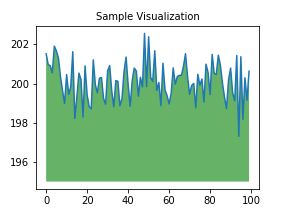

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab not defterleri Google'ın bulut sunucularında kod yürütür. Yani makinenizin gücünden bağımsız olarak,<a href="#using-accelerated-hardware">GPU'lar ve TPU'lar</a> dahil Google donanımının gücünden yararlanabilirsiniz. Tek ihtiyacınız olan şey bir tarayıcıdır.

Örneğin, <strong>pandas</strong> kodunun çalışmasını tamamlamasını bekliyor ve daha hızlı şekilde ilerlemek istiyorsanız bir GPU Çalışma Zamanı'na geçebilir ve kod değişikliği gerektirmeden hızlanma sağlayan <a href="https://rapids.ai/cudf-pandas">RAPIDS cuDF</a> gibi kitaplıkları kullanabilirsiniz.

Colab'da pandas'ı hızlandırma hakkında daha fazla bilgi edinmek için <a href="https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb">10 dakikalık kılavuzu</a> veya
 <a href="https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb">ABD menkul kıymetler piyasası veri analizi demosunu</a> inceleyin.

<div class="markdown-google-sans">

## Makine öğrenimi
</div>

Colab ile bir resim veri kümesini içe aktarabilir, üzerinde bir resim sınıflandırıcıyı eğitebilir ve modeli değerlendirebilirsiniz. Hem de sadece <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">birkaç satır kodla</a>.

Colab, makine öğrenimi topluluğunda yaygın olarak şu uygulamalarla kullanılır:
- TensorFlow'u kullanmaya başlama
- Nöral ağ geliştirme ve eğitme
- TPU'lar ile deneme yapma
- Yapay zeka araştırmalarını yayma
- Eğitici oluşturma

Makine öğrenimi uygulamalarını açıklayarak tanıtan örnek Colab not defterlerini görmek için aşağıdaki <a href="#machine-learning-examples">makine öğrenimi örneklerine</a> bakabilirsiniz.

<div class="markdown-google-sans">

## Diğer Kaynaklar

### Colab'de Not Defterleriyle Çalışma

</div>

- [Colab'e genel bakış](/notebooks/basic_features_overview.ipynb)
- [Markdown rehberi](/notebooks/markdown_guide.ipynb)
- [Kitaplıkları içe aktarma ve bağımlıları yükleme](/notebooks/snippets/importing_libraries.ipynb)
- [GitHub'da not defteri kaydetme ve yükleme](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Etkileşimli formlar](/notebooks/forms.ipynb)
- [Etkileşimli widget'lar](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Verilerle Çalışma
</div>

- [Veri yükleme: Drive, E-Tablolar ve Google Cloud Storage](/notebooks/io.ipynb)
- [Grafikler: Veri görselleştirme](/notebooks/charts.ipynb)
- [BigQuery'yi kullanmaya başlama](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Makine Öğrenimi

<div>

Google'ın online Makine Öğrenimi kursu da dahil olmak üzere Makine Öğrenimi ile ilgili birkaç not defterini burada bulabilirsiniz. Daha fazlası için <a href="https://developers.google.com/machine-learning/crash-course/">tam kurs web sitesine</a> bakın.
- [Pandas DataFrame'e giriş](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Pandas'ı hızlandırmak için RAPIDS cuDF'ye giriş](https://nvda.ws/rapids-cudf)
- [cuML'nin hızlandırıcı modunu kullanmaya başlama](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cuml_sklearn_colab_demo.ipynb)
- [Sentetik veriler kullanarak tf.keras ile doğrusal regresyon](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Hızlandırılmış Donanım Kullanma
</div>

- [GPU'lar ile TensorFlow](/notebooks/gpu.ipynb)
- [Colab'deki TPU'lar](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Öne çıkan örnekler

</div>

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Bir Resim Sınıflandırıcıyı Yeniden Eğitme</a>: Çiçekleri ayırt etmek için önceden eğitilmiş bir resim sınıflandırıcının üzerine bir Keras modeli inşa eder.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Metin Sınıflandırma</a>: IMDB'deki film yorumlarını <em>olumlu</em> veya <em>olumsuz</em> olarak sınıflandırır.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Stil Aktarımı</a>: Resimler arasında stil aktarımı yapmak için derin öğrenmeyi kullanır.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Çok Dilli Evrensel Cümle Kodlayıcı Soru-Cevap</a>: SQuAD veri kümesinden soruları cevaplamak için bir makine öğrenimi modeli kullanır.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Video İnterpolasyonu</a>: Bir videonun ilk ve son karesi arasında ne olduğunu tahmin eder.
